# Single-user Experiments

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Read entire df

In [2]:
frames = []
for main_user_strategy in ["RANDOM", "KEEP-RENTING", "INSTANT-BUY", "DET", "RAND", "A-ADAPTED"]:
    df_temp = pd.read_csv(
        f"Model/Experiments/single-user/output/data/single-user_{main_user_strategy}.csv")
    frames.append(df_temp)
df = pd.concat(frames)

keep_columns = ["RunId", "main_user_strategy", "AgentID", "active",
                "state", "bought_at_day", "max_days", "VET", "VTHO","initial_buy_price", "total_FIAT_spent_rent", "total_FIAT_spent_buying", "optimal", "main_user_CR"]

df = df[keep_columns]
df = df.groupby("AgentID")
df = df.get_group(1)
df

,RunId,main_user_strategy,AgentID,active,state,bought_at_day,max_days,VET,VTHO,initial_buy_price,total_FIAT_spent_rent,total_FIAT_spent_buying,optimal,main_user_CR
0,0,RANDOM,1,False,BOUGHT,1984,3020,0,0,54.398148,2.9760,54.398148,4.5300,12.665375
1,1,RANDOM,1,False,RENTING,0,2366,0,0,54.398148,3.5505,0.000000,3.5490,1.000000
2,2,RANDOM,1,False,BOUGHT,1818,1990,0,0,54.398148,2.7270,54.398148,2.9850,19.137403
3,3,RANDOM,1,False,BOUGHT,872,2965,0,0,54.398148,1.3080,54.398148,4.4475,12.525272
4,4,RANDOM,1,False,RENTING,0,383,0,0,54.398148,0.5760,0.000000,0.5745,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,A-ADAPTED,1,False,RENTING,0,1247,0,0,54.398148,1.8720,0.000000,1.8705,1.000000
9996,9996,A-ADAPTED,1,False,RENTING,0,3184,0,0,54.398148,4.7775,0.000000,4.7760,1.000000
9997,9997,A-ADAPTED,1,False,RENTING,0,1390,0,0,54.398148,2.0865,0.000000,2.0850,1.000000
9998,9998,A-ADAPTED,1,False,RENTING,0,3009,0,0,54.398148,4.5150,0.000000,4.5135,1.000000


### Maximum achieved CR per algorithm

In [3]:
pd.DataFrame(df.groupby(["main_user_strategy"])["main_user_CR"].max()).reset_index()


,main_user_strategy,main_user_CR
0,A-ADAPTED,1.000000
1,DET,1.000000
2,INSTANT-BUY,36265.432099
3,KEEP-RENTING,1.000000
4,RAND,271.525613
5,RANDOM,772.583662


### Mean CR per algorithm

In [4]:
pd.DataFrame(df.groupby(["main_user_strategy"])["main_user_CR"].mean()).reset_index()

,main_user_strategy,main_user_CR
0,A-ADAPTED,1.000000
1,DET,1.000000
2,INSTANT-BUY,100.772601
3,KEEP-RENTING,1.000000
4,RAND,1.514954
5,RANDOM,10.507778


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


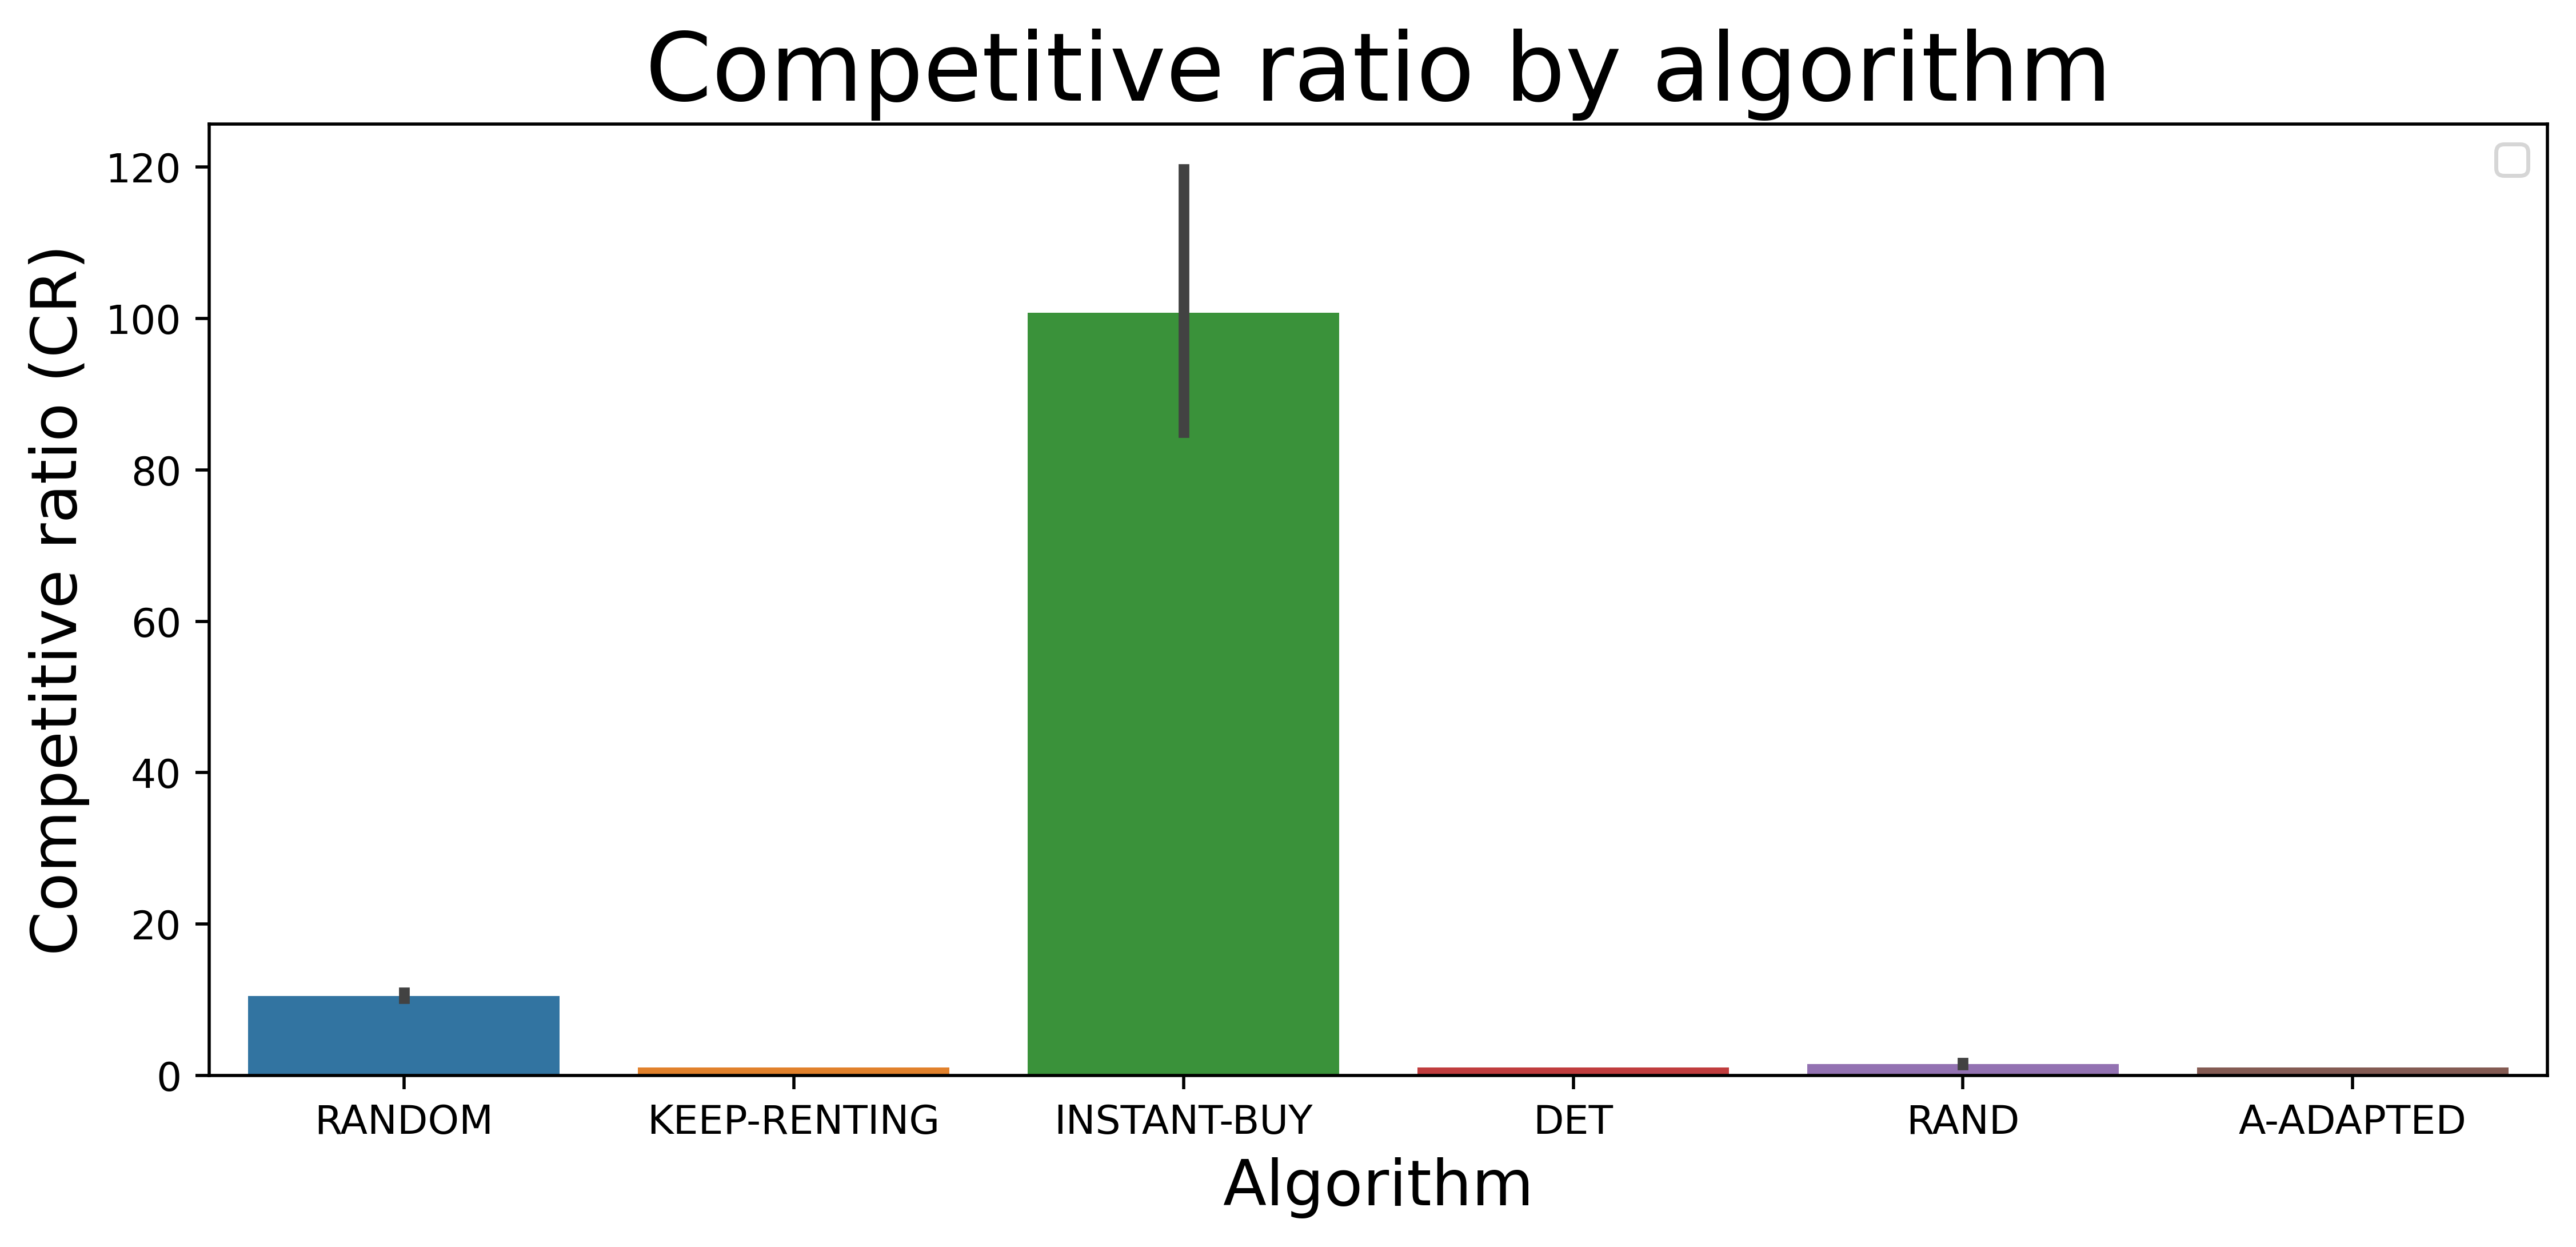

In [5]:
df2 = df

# Initialize plot
fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=500)
plt.tight_layout(pad=5.0)
plt.title("Competitive ratio by algorithm", fontsize=24)

sns.barplot(x="main_user_strategy", y="main_user_CR",
               data=df2,)

ax.set_ylabel('Competitive ratio (CR)', fontsize=16)
ax.set_xlabel('Algorithm', fontsize=16)
ax.tick_params(axis='y')
# plt.ylim(0.5,2.5)

ax.legend()

plt.savefig("Model/Experiments/single-user/output/img/single-user-CR-violin.png")
